[View in Colaboratory](https://colab.research.google.com/github/michalMalujdy/machine-learning-colab/blob/master/imdb_binary_classification.ipynb)

# Binary classification with Keras
Learning binary classification of film reviews (positive or negative) from IMDB using Keras framework

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



---



Function preprocessing a single review by transforming a list of integers to numpy one demensional array (a vector) where all values are zeros except for the indexes that corresponds to the list numbers (keys for words), where the value is set to 1.

In [0]:
import numpy as np

def preprocessReview(review):
  preprocessedVector = np.zeros(10000)
  
  for index in review:
    preprocessedVector[index] = 1
  
  return preprocessedVector



---



Function that does the trick mentioned above for all reviews in passed list of lists, so the return type is numpy array.

In [0]:
def preprocessReviews(reviews):

  input_array = np.empty([len(train_data), 10000])

  for i, review in enumerate(reviews):
    input_array[i] = preprocessReview(review)
    
  return input_array



---



Preprocess input data and labels data. The latter needs to be float32 numpay array, so the transformation is simple from int to float. But the input is preprocessed by adequate functions stated previously.

In [0]:
input_train = preprocessReviews(train_data)
input_test = preprocessReviews(test_data)

train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')



---



Divide the train data into two sets: the actual training set and a validation set used during the training (**do not mistake with test set that is used AFTER the training**)

In [0]:
validation_set_size = 10000

input_train_validation = input_train[:validation_set_size]
input_train_partial = input_train[validation_set_size:]

train_labels_validation = train_labels[:validation_set_size]
train_labels_partial = train_labels[validation_set_size:]



---



Create the network model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

net = Sequential()
net.add(Dense(4, activation = 'sigmoid', input_dim = 10000))
net.add(Dense(6, activation = 'sigmoid'))
net.add(Dense(4, activation = 'sigmoid'))
net.add(Dense(1, activation = 'sigmoid'))

epochs_count = 25;

net.compile(optimizer = 'rmsprop',
           loss = 'binary_crossentropy',
           metrics = ['accuracy'])



---



Actual network learning.

In [124]:
training_history = net.fit(
    input_train_partial, 
    train_labels_partial, 
    epochs = epochs_count, 
    batch_size = 512,
    validation_data=(input_train_validation, train_labels_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/25
15000/15000 [==============================] - 2s 134us/step - loss: 0.7093 - acc: 0.4965 - val_loss: 0.6999 - val_acc: 0.5053
Epoch 2/25
15000/15000 [==============================] - 1s 85us/step - loss: 0.6974 - acc: 0.4965 - val_loss: 0.6913 - val_acc: 0.5053
Epoch 3/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.6890 - acc: 0.4965 - val_loss: 0.6853 - val_acc: 0.5053
Epoch 4/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.6830 - acc: 0.4979 - val_loss: 0.6806 - val_acc: 0.5361
Epoch 5/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.6772 - acc: 0.7222 - val_loss: 0.6750 - val_acc: 0.8165
Epoch 6/25
15000/15000 [==============================] - 1s 85us/step - loss: 0.6701 - acc: 0.8639 - val_loss: 0.6680 - val_acc: 0.8584
Epoch 7/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.6617 - acc: 0.8909 - val_loss: 0.6597 - val_ac

15000/15000 [==============================] - 1s 85us/step - loss: 0.6400 - acc: 0.9033 - val_loss: 0.6388 - val_acc: 0.8701
Epoch 10/25
15000/15000 [==============================] - 1s 86us/step - loss: 0.6271 - acc: 0.9069 - val_loss: 0.6267 - val_acc: 0.8762
Epoch 11/25
15000/15000 [==============================] - 1s 86us/step - loss: 0.6127 - acc: 0.9135 - val_loss: 0.6132 - val_acc: 0.8757
Epoch 12/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.5967 - acc: 0.9169 - val_loss: 0.5985 - val_acc: 0.8800
Epoch 13/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.5795 - acc: 0.9211 - val_loss: 0.5828 - val_acc: 0.8819
Epoch 14/25
15000/15000 [==============================] - 1s 86us/step - loss: 0.5609 - acc: 0.9248 - val_loss: 0.5662 - val_acc: 0.8838
Epoch 15/25
15000/15000 [==============================] - 1s 88us/step - loss: 0.5413 - acc: 0.9278 - val_loss: 0.5491 - val_acc: 0.8854
Epoch 16/25
15000/15000 [=====================

15000/15000 [==============================] - 1s 86us/step - loss: 0.4790 - acc: 0.9361 - val_loss: 0.4961 - val_acc: 0.8905
Epoch 19/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.4575 - acc: 0.9393 - val_loss: 0.4784 - val_acc: 0.8911
Epoch 20/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.4360 - acc: 0.9415 - val_loss: 0.4612 - val_acc: 0.8899
Epoch 21/25
15000/15000 [==============================] - 1s 86us/step - loss: 0.4146 - acc: 0.9457 - val_loss: 0.4441 - val_acc: 0.8902
Epoch 22/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.3933 - acc: 0.9477 - val_loss: 0.4278 - val_acc: 0.8907
Epoch 23/25
15000/15000 [==============================] - 1s 87us/step - loss: 0.3727 - acc: 0.9505 - val_loss: 0.4124 - val_acc: 0.8914
Epoch 24/25
15000/15000 [==============================] - 1s 86us/step - loss: 0.3527 - acc: 0.9527 - val_loss: 0.3981 - val_acc: 0.8925
Epoch 25/25
15000/15000 [=====================



---



Display the accuraccy on test data

In [125]:
(_, accuracy) = net.evaluate(input_test, test_labels)
print(accuracy)

25000/25000 [==============================] - 3s 133us/step
0.88548




---



# Optional

Decode the review from a list of integers indicating the word in dictionary to a readable text. The words are not stored in a concise order, so the output may not be understandable.

In [126]:
from random import randint

word_index_dict = imdb.get_word_index()
index_word_dict = {value: key for (key, value) in word_index_dict.items()}

random_review_index = randint(0, len(test_data) - 1)
review_ints_list = test_data[random_review_index];
review_words_list = [index_word_dict[key] for key in review_ints_list]
review_text = ' '.join(review_words_list)

print(review_text)

the as ever there in at only starts some br an of wild fact day worth just interpretation or of and other or of every spielberg as ever it is sam americans what have plain film we wonder rubbish as and was body in also of apparently some but numerous to also that some are year scene it of and tomorrow misguided and teenagers and and good br only starts rating story one in at to dozen third was other several of today replies film of apart whole for short in kay we some by br of seems was story one in air of year spielberg in adults story at of and totally says times new know of steven gay story at was then does what think br have start for lot not series by br of watched seems for total those heroine in we was let saw are black br of repeat of day original example there will scary are year her was why numerous to other interpretation or of and to false of resist of original real at scary movies bad of beginning kids in died comes emma bad kids as disturbing ever are year her wonder poet



---



Chart showing the relation between training loss and epochs and also validation loss and epochs

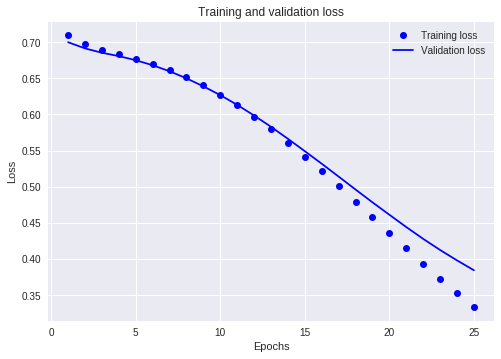

In [127]:
import matplotlib.pyplot as plt

history_dict = training_history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, epochs_count + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



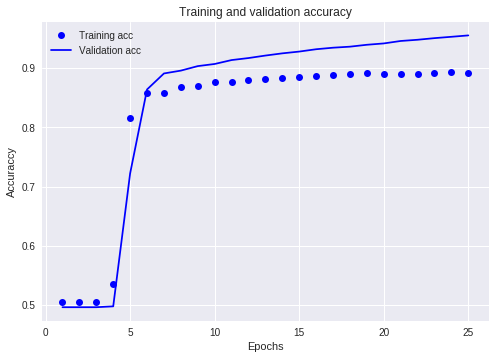

In [128]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, val_acc_values, 'bo', label='Training acc')
plt.plot(epochs, acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuraccy')
plt.legend()
plt.show()



---

